## ЛР №3 Абдуллаев Т.Х. ИУ5-63

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:

import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold

In [4]:
from sklearn.model_selection import train_test_split

In [19]:
data = pd.read_csv('documents/ТМО Лаб.2/beers.csv', sep=",")

In [20]:
# уберем непонятный для нас параметр, чтобы он не помешал в будущем
data.drop(['Unnamed: 0', 'ibu', 'name', 'style'], axis = 1, inplace = True)


In [21]:
data


,abv,id,brewery_id,ounces
0,0.050,1436,408,12.0
1,0.066,2265,177,12.0
2,0.071,2264,177,12.0
3,0.090,2263,177,12.0
4,0.075,2262,177,12.0
...,...,...,...,...
2405,0.067,928,424,12.0
2406,0.052,807,424,12.0
2407,0.055,620,424,12.0
2408,0.055,145,424,12.0


In [34]:
data = data.fillna(1)
data.head()

,abv,id,brewery_id,ounces
0,0.050,1436,408,12.0
1,0.066,2265,177,12.0
2,0.071,2264,177,12.0
3,0.090,2263,177,12.0
4,0.075,2262,177,12.0


In [35]:
parts = np.split(data, [3,4], axis=1)
X = parts[0]
Y = parts[1]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

      abv      id  brewery_id
0  0.050  1436.0       408.0
1  0.066  2265.0       177.0
2  0.071  2264.0       177.0
3  0.090  2263.0       177.0
4  0.075  2262.0       177.0 

Выходные данные:

    ounces
0    12.0
1    12.0
2    12.0
3    12.0
4    12.0


## Разделение выборки

In [36]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, test_size=0.03)

In [37]:
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

         abv      id  brewery_id
316   1.000  2489.0        77.0
1842  0.047   814.0       385.0
399   0.090  2481.0        10.0
663   0.055  1105.0       169.0
356   0.065  1629.0       300.0 

Входные параметры тестовой выборки:

         abv      id  brewery_id
2084  0.062    12.0        61.0
181   0.044   965.0       483.0
509   0.061   793.0       155.0
1569  0.065   755.0       166.0
1244  0.043  2209.0        91.0 

Выходные параметры обучающей выборки:

       ounces
316     12.0
1842    12.0
399     16.0
663     12.0
356     16.0 

Выходные параметры тестовой выборки:

       ounces
2084    16.0
181     12.0
509     12.0
1569    12.0
1244    12.0


In [38]:
# Проверим правильность разделения выборки на тестовую и обучающую. Посмотрим на размеры матриц.
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2337, 3)
(73, 3)
(2337, 1)
(73, 1)


In [39]:
data

,abv,id,brewery_id,ounces
0,0.050,1436,408,12.0
1,0.066,2265,177,12.0
2,0.071,2264,177,12.0
3,0.090,2263,177,12.0
4,0.075,2262,177,12.0
...,...,...,...,...
2405,0.067,928,424,12.0
2406,0.052,807,424,12.0
2407,0.055,620,424,12.0
2408,0.055,145,424,12.0


## Модель ближайших соседей для произвольного гиперпараметра K

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
# Решение задачи регрессии методом 2, 5 и 10 ближайших соседей
Regressor_2NN = KNeighborsRegressor(n_neighbors = 2) 
Regressor_5NN = KNeighborsRegressor(n_neighbors = 5)
Regressor_10NN = KNeighborsRegressor(n_neighbors = 10) 
print('Пример модели:\n\n', Regressor_10NN)

Пример модели:

 KNeighborsRegressor(n_neighbors=10)


In [42]:
Regressor_2NN.fit(X_train, Y_train)
Regressor_5NN.fit(X_train, Y_train)
Regressor_10NN.fit(X_train, Y_train)
target_2NN = Regressor_2NN.predict(X_test)
target_5NN = Regressor_5NN.predict(X_test)
target_10NN = Regressor_10NN.predict(X_test)
print('Пример предсказанных значений:\n\n', target_10NN[:5], '\n ...')

Пример предсказанных значений:

 [[14.8]
 [14. ]
 [12. ]
 [12.8]
 [14. ]] 
 ...


## Оценка качества регрессии (Метрики качества)¶

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score , accuracy_score

In [44]:
# Оценка средней абсолютной ошибки
print('Средняя абсолютная ошибка для 2 ближайших соседей:',mean_absolute_error(Y_test,
target_2NN))
print('Средняя абсолютная ошибка для 5 ближайших соседей:',mean_absolute_error(Y_test,
target_5NN))
print('Средняя абсолютная ошибка для 10 ближайших соседей:',mean_absolute_error(Y_test,
target_10NN))

Средняя абсолютная ошибка для 2 ближайших соседей: 0.8986301369863013
Средняя абсолютная ошибка для 5 ближайших соседей: 1.3643835616438358
Средняя абсолютная ошибка для 10 ближайших соседей: 1.5972602739726027


In [45]:
# Оценка средней квадратичной ошибки
print('Средняя квадратичная ошибка для 2 ближайших соседей:',mean_squared_error(Y_test,
target_2NN))
print('Средняя квадратичная ошибка для 5 ближайших соседей:',mean_squared_error(Y_test,
target_5NN))
print('Средняя квадратичная ошибка для 10 ближайших соседей:',mean_squared_error(Y_test
, target_10NN))

Средняя квадратичная ошибка для 2 ближайших соседей: 2.446027397260274
Средняя квадратичная ошибка для 5 ближайших соседей: 2.853610958904109
Средняя квадратичная ошибка для 10 ближайших соседей: 3.356865753424657


In [46]:
# Оценка коэффициента детерминации

print('Коэффициент детерминации для 2 ближайших соседей:',r2_score(Y_test, target_2NN))
print('Коэффициент детерминации для 5 ближайших соседей:',r2_score(Y_test, target_5NN))
print('Коэффициент детерминации для 10 ближайших соседей:',r2_score(Y_test, target_10NN
))

Коэффициент детерминации для 2 ближайших соседей: 0.33332242225859243
Коэффициент детерминации для 5 ближайших соседей: 0.22223338788870717
Коэффициент детерминации для 10 ближайших соседей: 0.08506865793780705


In [47]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Подбор гиперпараметров
## GridSearch через среднюю квадратичную ошибку
Рассмотрим все количества ближайших соседей от 1 до 100, чтобы найти лучший результат. Возьмем 10 фолдов.

In [49]:
from sklearn.model_selection import GridSearchCV
n_range = np.array(range(1, 101, 1))
tuned_parameters = [{'n_neighbors': n_range}]
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])}],
             scoring='neg_mean_squared_error')

In [50]:
print('Лучшая модель:\n\n', gs.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs.best_params_) 
print('\nЛучшее значение средней квадратичной ошибки:\n\n',gs.best_score_)

Лучшая модель:

 KNeighborsRegressor(n_neighbors=4)

Лучшее число ближайших соседей:

 {'n_neighbors': 4}

Лучшее значение средней квадратичной ошибки:

 -4.683636819770001


Изменение качества тестовой выборки в зависимости от кол-ва соседей:



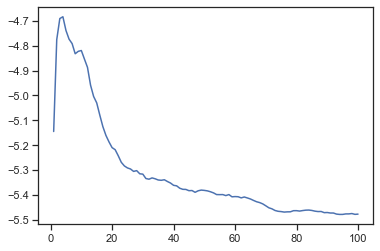

In [51]:
print('Изменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs.cv_results_['mean_test_score'])

## GridSearch через коэффициент детерминации

Лучшая модель:

 KNeighborsRegressor(n_neighbors=4)

Лучшее число ближайших соседей:

 {'n_neighbors': 4}

Лучшее значение коэффициента детерминации:

 0.15700927216504695

Изменение качества тестовой выборки в зависимости от кол-ва соседей:



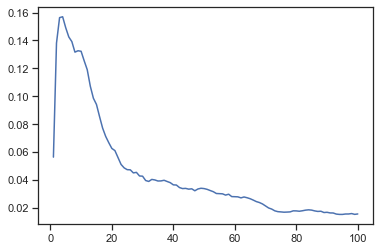

In [52]:
gs_det = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='r2') 
gs_det.fit(X_train, Y_train)
print('Лучшая модель:\n\n', gs_det.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs_det.best_params_)
print('\nЛучшее значение коэффициента детерминации:\n\n',gs_det.best_score_)
print('\nИзменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs_det.cv_results_['mean_test_score'])

## Кросс-валидация

In [54]:
from sklearn.model_selection import cross_val_score
scores_2NN = cross_val_score(KNeighborsRegressor(n_neighbors = 2), X, Y, cv=5, scoring= 'r2')
scores_5NN = cross_val_score(KNeighborsRegressor(n_neighbors = 5), X, Y, cv=5, scoring= 'r2')
scores_10NN = cross_val_score(KNeighborsRegressor(n_neighbors = 10), X, Y, cv=5, scoring = 'r2')
scores_50NN = cross_val_score(KNeighborsRegressor(n_neighbors = 50), X, Y, cv=5, scoring = 'r2')
scores_100NN = cross_val_score(KNeighborsRegressor(n_neighbors = 100), X, Y, cv=5, scoring = 'r2')
print('Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: \n', scores_10NN, '\n\n')
print('Усредненное значение коэффициента детерминации для:\n') 
print('- 2 ближайших соседей:', np.mean(scores_2NN), '\n') 
print('- 5 ближайших соседей:', np.mean(scores_5NN), '\n') 
print('- 10 ближайших соседей:', np.mean(scores_10NN), '\n') 
print('- 50 ближайших соседей:', np.mean(scores_50NN), '\n') 
print('- 100 ближайших соседей:', np.mean(scores_100NN), '\n')

Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: 
 [-0.12029348 -0.42627094 -0.05717186 -0.03865044 -0.0929974 ] 


Усредненное значение коэффициента детерминации для:

- 2 ближайших соседей: -0.4314259300475788 

- 5 ближайших соседей: -0.2559768154189943 

- 10 ближайших соседей: -0.14707682474512168 

- 50 ближайших соседей: -0.06013780356346583 

- 100 ближайших соседей: -0.030908517635843836 

